In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score
import matplotlib.pyplot as plt

In [33]:
data = pd.read_excel('/content/preprocessed_data.xlsx')

In [34]:
data = data.dropna()

In [35]:
data['StockCode'] = data['StockCode'].astype(str)
data['Description'] = data['Description'].astype(str)
data['Country'] = data['Country'].astype(str)

In [36]:
label_encoder = LabelEncoder()
data['StockCode'] = label_encoder.fit_transform(data['StockCode'])
data['Description'] = label_encoder.fit_transform(data['Description'])
data['Country'] = label_encoder.fit_transform(data['Country'])

In [37]:
numerical_features = ['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']

In [38]:
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

In [39]:
data = data.dropna(subset=numerical_features)

X_numerical = data[numerical_features]

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

In [41]:
X_encoded = data[['StockCode', 'Description', 'Country']]
X_final = np.concatenate([X_scaled, X_encoded], axis=1)

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_final)

In [44]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_final)

In [45]:
print(f"Jumlah baris data: {len(data)}")
print(f"Jumlah label K-Means: {len(kmeans_labels)}")
print(f"Jumlah label DBSCAN: {len(dbscan_labels)}")

Jumlah baris data: 397924
Jumlah label K-Means: 397924
Jumlah label DBSCAN: 397924


In [46]:
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

In [49]:
subset_indices = np.random.choice(X_final.shape[0], size=1000, replace=False)  # Ambil 1000 sampel acak
X_subset = X_final[subset_indices]
kmeans_labels_subset = kmeans_labels[subset_indices]
dbscan_labels_subset = dbscan_labels[subset_indices]

kmeans_silhouette = silhouette_score(X_subset, kmeans_labels_subset)
dbscan_silhouette = (
    silhouette_score(X_subset, dbscan_labels_subset) if len(set(dbscan_labels_subset)) > 1 else -1
)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

K-Means Silhouette Score: 0.380
DBSCAN Silhouette Score: 0.145


In [50]:
print("Columns in the dataset:", data.columns)

print(f"First 5 rows with clustering results:\n{data.head()}")

Columns in the dataset: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'KMeans_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')
First 5 rows with clustering results:
   InvoiceNo  StockCode  Description  Quantity         InvoiceDate  UnitPrice  \
0   536365.0       3249         3716         6 2010-12-01 08:26:00       2.55   
1   536365.0       2649         3724         6 2010-12-01 08:26:00       3.39   
2   536365.0       2855          861         8 2010-12-01 08:26:00       2.75   
3   536365.0       2803         1813         6 2010-12-01 08:26:00       3.39   
4   536365.0       2802         2776         6 2010-12-01 08:26:00       3.39   

   CustomerID  Country  KMeans_Cluster  DBSCAN_Cluster  
0     17850.0       35               2               0  
1     17850.0       35               2               1  
2     17850.0       35               1               2  
3     17850.0       35               

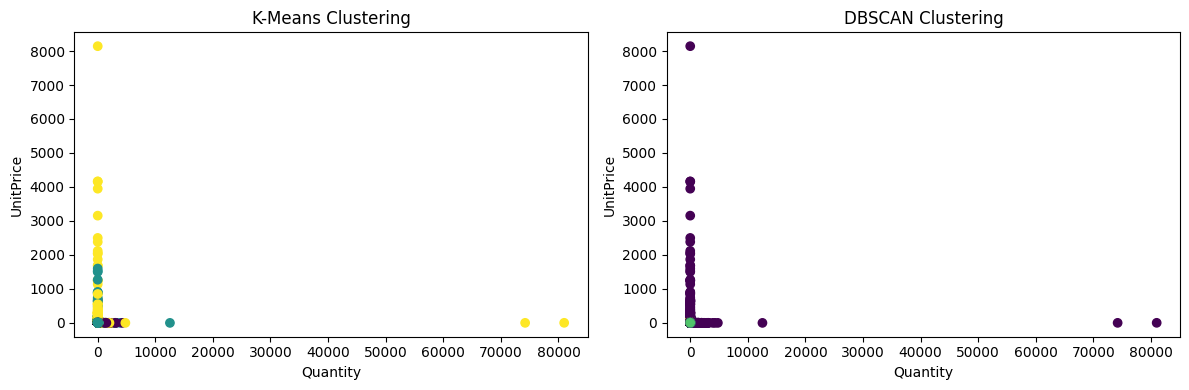

In [51]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

plt.subplot(1, 2, 2)
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

plt.tight_layout()
plt.show()

In [52]:
output_file = 'hasil_clustering.csv'
data.to_csv(output_file, index=False)

print(f"Hasil clustering telah disimpan ke file: {output_file}")

Hasil clustering telah disimpan ke file: hasil_clustering.csv
